In [1]:
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1005. Miscellaneous Analyses/P1005.6. Yael RNAseq Grant/P1005.6.3. Analyses/P1005.6.3.2. Volcano Plots/Output')
cur_date = "012224"

library(readxl)
library(tidyverse)
library(reshape2)
library(ggrepel)

#reading in file
ds_df = data.frame(read_excel("Input/Baseline_Disease_Status_DESeq2_012224.xlsx")) %>%
    mutate(Variable = "Non-Asthmatics vs. Asthmatics")
sex_df = data.frame(read_excel("Input/Baseline_Sex_DESeq2_012324.xlsx")) %>%
    mutate(Variable = "Females vs. Males")
gautam_genes_df = data.frame(read_excel("Input/Gautam_Genes.xlsx"))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
# creating 1 df
full_df = rbind(ds_df, sex_df)
head(full_df)

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Covariates,Variable
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,WDR72,82.61173,-1.415197853,0.3913886,-3.615838636,0.0002993768,0.2164494,None,Non-Asthmatics vs. Asthmatics
2,A4GALT,3630.43384,-0.076683258,0.2492010,-0.307716522,0.7582980464,0.9994528,None,Non-Asthmatics vs. Asthmatics
3,AADAC,46.97667,-0.002850104,0.8664921,-0.003289244,0.9973755675,0.9994528,None,Non-Asthmatics vs. Asthmatics
4,ABCA13,194.16577,0.014946052,0.7127267,0.020970242,0.9832693935,0.9994528,None,Non-Asthmatics vs. Asthmatics
5,ABHD17C,750.04263,-0.088364233,0.3980906,-0.221970166,0.8243371080,0.9994528,None,Non-Asthmatics vs. Asthmatics
6,ABHD2,951.39202,-0.119834423,0.2542955,-0.471240819,0.6374687722,0.9994528,None,Non-Asthmatics vs. Asthmatics


Creating a volcano plot to visualize genes that were differentially expressed in asthmatics vs. non-asthmatics with sex as a covariate. 

In [3]:
# adding a col to denote whether a gene had a significant p value, log FC, or both

# add a column of NAs
full_df$diffexpressed <- "No Significance"

# if p value is significant only
full_df$diffexpressed[ds_df$pvalue < 0.05] <- "P Value Only"

# if log2FoldChange > log2(1.5) and pvalue < 0.05, set as "significant" 
full_df$diffexpressed[abs(full_df$log2FoldChange) > abs(log2(1.5)) & full_df$pvalue < 0.05] <- "P Value and log2 Fold Change"

# making into a factor
full_df$diffexpressed = factor(full_df$diffexpressed, levels = c("No Significance", "P Value Only", 
                                                                       "P Value and log2 Fold Change"))

# viewing df
head(full_df)

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Covariates,Variable,diffexpressed
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
1,WDR72,82.61173,-1.415197853,0.3913886,-3.615838636,0.0002993768,0.2164494,None,Non-Asthmatics vs. Asthmatics,P Value and log2 Fold Change
2,A4GALT,3630.43384,-0.076683258,0.2492010,-0.307716522,0.7582980464,0.9994528,None,Non-Asthmatics vs. Asthmatics,No Significance
3,AADAC,46.97667,-0.002850104,0.8664921,-0.003289244,0.9973755675,0.9994528,None,Non-Asthmatics vs. Asthmatics,No Significance
4,ABCA13,194.16577,0.014946052,0.7127267,0.020970242,0.9832693935,0.9994528,None,Non-Asthmatics vs. Asthmatics,No Significance
5,ABHD17C,750.04263,-0.088364233,0.3980906,-0.221970166,0.8243371080,0.9994528,None,Non-Asthmatics vs. Asthmatics,No Significance
6,ABHD2,951.39202,-0.119834423,0.2542955,-0.471240819,0.6374687722,0.9994528,None,Non-Asthmatics vs. Asthmatics,No Significance


In [4]:
filtered_df = full_df %>%
    # filtering for the model that incorporated sex as a covariate
    filter(Covariates == 'Sex'& Variable == "Non-Asthmatics vs. Asthmatics" | Variable == "Females vs. Males") %>%
    # removing information that denotes that a gene is a duplicate
    separate(Gene, c("Gene", NA))

head(filtered_df)

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 1176 rows [1, 2, 3, 4, 5,
6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Covariates,Variable,diffexpressed
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
1,WDR72,82.61173,-1.5737480,0.4253882,-3.6995573,0.0002159758,0.1559346,Sex,Non-Asthmatics vs. Asthmatics,P Value and log2 Fold Change
2,EPHX4,140.13350,1.0344898,0.3159694,3.2740192,0.0010602941,0.3827662,Sex,Non-Asthmatics vs. Asthmatics,P Value and log2 Fold Change
3,A4GALT,3630.43384,-0.2035312,0.2665413,-0.7636010,0.4451050324,0.9994984,Sex,Non-Asthmatics vs. Asthmatics,No Significance
4,AADAC,46.97667,-0.4455243,0.7906226,-0.5635107,0.5730872042,0.9994984,Sex,Non-Asthmatics vs. Asthmatics,No Significance
5,ABCA13,194.16577,-0.6090077,0.6453011,-0.9437573,0.3452936604,0.9994984,Sex,Non-Asthmatics vs. Asthmatics,No Significance
6,ABHD17C,750.04263,-0.4261057,0.3957948,-1.0765824,0.2816668827,0.9994984,Sex,Non-Asthmatics vs. Asthmatics,No Significance


In [5]:
# will filter for 420 genes found to have sex specific associations in previous literature
gautam_genes = gautam_genes_df$Gene
length(gautam_genes)

[1] 420

In [6]:
# creating dfs for significant genes
sig_sex_genes_df = filtered_df %>%
    filter(diffexpressed == "P Value and log2 Fold Change", 
           Variable == "Females vs. Males", Gene %in% gautam_genes)
sig_ds_genes_df = filtered_df %>%
    filter(diffexpressed == "P Value and log2 Fold Change", 
           Variable == "Non-Asthmatics vs. Asthmatics")

head(sig_sex_genes_df)

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Covariates,Variable,diffexpressed
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
1,CD44,1697.67472,1.2713034,0.2701262,4.706331,2.522155e-06,0.001823518,None,Females vs. Males,P Value and log2 Fold Change
2,SLC22A4,342.32727,-1.8746593,0.4321823,-4.337658,1.440088e-05,0.005205920,None,Females vs. Males,P Value and log2 Fold Change
3,CKAP4,2700.54115,0.9095755,0.2969755,3.062796,2.192793e-03,0.075428750,None,Females vs. Males,P Value and log2 Fold Change
4,SCEL,197.38871,1.9151419,0.6435475,2.975914,2.921169e-03,0.075428750,None,Females vs. Males,P Value and log2 Fold Change
5,CPA4,189.95495,1.7738515,0.6188781,2.866237,4.153828e-03,0.088689804,None,Females vs. Males,P Value and log2 Fold Change
6,CAPN14,71.06425,1.9764971,0.7056006,2.801155,5.091998e-03,0.090200398,None,Females vs. Males,P Value and log2 Fold Change


# Volcano Plot

Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


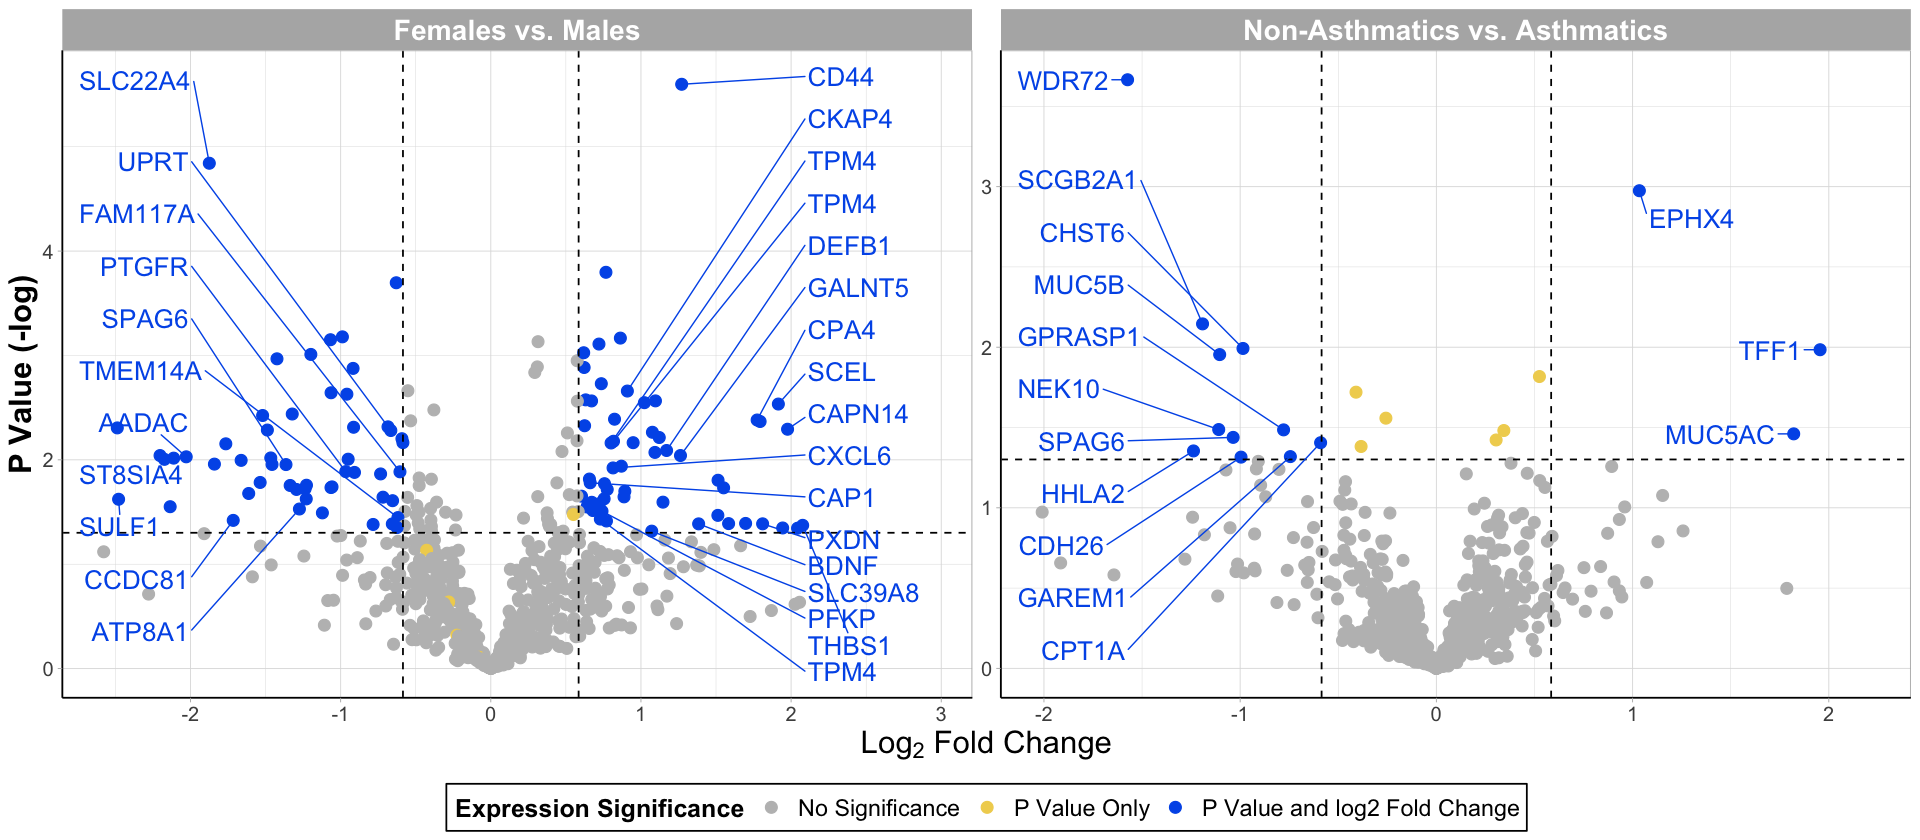

In [7]:
options(repr.plot.width=16, repr.plot.height=7) #changing size

FigureX = ggplot() + 
  geom_point(data = filtered_df, aes(x = log2FoldChange, y = -log10(pvalue), color = diffexpressed), size = 3) + 

  # P Value line
  geom_hline(yintercept = -log10(0.05), linetype = "dashed") + 
  # FC Line
  geom_vline(xintercept = log2(1.5), linetype = "dashed") +
  geom_vline(xintercept = -log2(1.5), linetype = "dashed") +

 # changing x limits of what is visible in the plot
 # xlim(-2, NA) + 
 facet_wrap(~Variable, scales = 'free') + 

 #labeling points with statistical significance and FC
 geom_text_repel(data = sig_ds_genes_df %>%
                            filter(log2FoldChange > log2(1.5)), 
    aes(x = log2FoldChange, y = -log10(pvalue), label = Gene, color = diffexpressed), 
    xlim = c(1, NA), hjust = 0, segment.size = 0.4, box.padding = 0.7, max.overlaps = Inf, size = 5.5, show.legend = FALSE) + 

  geom_text_repel(data = sig_ds_genes_df %>%
                      filter(log2FoldChange < log2(1.5)), 
    aes(x = log2FoldChange, y = -log10(pvalue), label = Gene, color = diffexpressed),
    xlim = c(NA, -1.5), hjust = 0, segment.size = 0.4, box.padding = 0.7, max.overlaps = Inf, size = 5.5, show.legend = FALSE) + 

  geom_text_repel(data = sig_sex_genes_df %>%
                            filter(log2FoldChange > log2(1.5)), 
    aes(x = log2FoldChange, y = -log10(pvalue), label = Gene, color = diffexpressed), 
    xlim = c(2, NA), hjust = 0, segment.size = 0.4, box.padding = 0.7, max.overlaps = Inf, size = 5.5, show.legend = FALSE) + 

  geom_text_repel(data = sig_sex_genes_df %>%
                      filter(log2FoldChange < log2(1.5)), 
    aes(x = log2FoldChange, y = -log10(pvalue), label = Gene, color = diffexpressed), nudge_y = 0.8,
    xlim = c(NA, -1.9), hjust = 0, segment.size = 0.4, box.padding = 0.7, max.overlaps = Inf, size = 5.5, show.legend = FALSE) + 

  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 15), #changes legend title
        legend.text = element_text(size = 14), #changes legend text
        legend.position = "bottom", # changing legend position
        legend.background = element_rect(colour = 'black', fill = 'white', linetype = 'solid'),
        strip.text.x = element_text(size = 17, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 17, face = "bold")) + #changes size of facet y axis 
  labs(x = expression(Log[2]*" Fold Change"), y = 'P Value (-log)') +

  scale_color_manual(name = "Expression Significance",
                      values = c("gray", '#F0D25E', "#005BEA"))

FigureX

In [8]:
# #exporting figure
# ggsave(FigureX, 
#        filename = 'FigureX.pdf',
#        path = Output,
#        width = 10, height = 7)